# PCA+K-means


In [1]:
import pandas as pd
import numpy as np
data_feature = pd.read_csv('../Data/features.csv')


In [2]:
data_feature.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,105,745.278374,19,38,26,22,57,25.552401,31.197699,17.231445,1.388890,0.548246,1.388890,0.630342,0.534947
1,183,609.722710,85,37,35,26,42,11.994545,22.397977,12.930285,4.444448,0.668169,1.944446,0.603175,0.536427
2,186,404.166990,141,18,9,18,40,7.822587,32.333359,14.435531,3.611114,0.617284,2.222224,0.833334,0.385836
3,97,313.055806,49,26,16,6,43,11.618566,23.479185,13.684270,4.444448,0.779915,2.222224,1.041667,0.773695
4,113,68.055610,97,4,5,7,17,2.168143,15.312512,5.404863,4.166670,1.388890,0.555556,0.388889,0.414367


In [3]:
np_data = data_feature.values

In [4]:
np_data

array([[1.05000000e+02, 7.45278374e+02, 1.90000000e+01, ...,
        1.38889000e+00, 6.30342385e-01, 5.34947196e-01],
       [1.83000000e+02, 6.09722710e+02, 8.50000000e+01, ...,
        1.94444600e+00, 6.03175086e-01, 5.36426773e-01],
       [1.86000000e+02, 4.04166990e+02, 1.41000000e+02, ...,
        2.22222400e+00, 8.33334000e-01, 3.85836324e-01],
       ...,
       [2.50000000e+02, 5.75000460e+02, 1.36000000e+02, ...,
        1.11111200e+00, 4.23976947e-01, 1.81603803e-01],
       [1.95000000e+02, 6.02222704e+02, 1.17000000e+02, ...,
        1.38889000e+00, 6.77083875e-01, 3.63775285e-01],
       [7.38000000e+02, 1.05064460e+04, 5.10000000e+01, ...,
        1.50767121e+01, 4.83671928e-01, 6.50210370e-01]])

In [5]:
def NormalizedStd(data):
    data_mean = np.mean(data, axis = 0)
    data_std = np.std(data, axis = 0)
    return (data - data_mean) / data_std
np_data = NormalizedStd(np_data)

In [6]:
np_data

array([[-4.29009892e-01, -1.80800110e-01, -6.31137352e-01, ...,
        -4.52051200e-02, -5.86306433e-02, -4.01335711e-02],
       [-5.94076004e-02, -2.05517133e-01,  3.65284706e-01, ...,
        -3.86496373e-02, -8.99769374e-02, -3.99202905e-02],
       [-4.51921276e-02, -2.42997865e-01,  1.21073373e+00, ...,
        -3.53718960e-02,  1.75586047e-01, -6.16278644e-02],
       ...,
       [ 2.58071291e-01, -2.11848338e-01,  1.13524721e+00, ...,
        -4.84828613e-02, -2.96740134e-01, -9.10679291e-02],
       [-2.54570940e-03, -2.06884673e-01,  8.48398431e-01, ...,
        -4.52051200e-02, -4.69916875e-03, -6.48079575e-02],
       [ 2.57045486e+00,  1.59903706e+00, -1.48023627e-01, ...,
         1.16309255e-01, -2.27862604e-01, -2.35184147e-02]])

## PCA 降维

In [219]:

from sklearn.decomposition import PCA

#保留多少个维度
pca = PCA(n_components=4)
np_data_3d = pca.fit(np_data)

#返回所保留的n个成分各自的方差百分比
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

data_new_3d = pca.transform(np_data)

print(data_new_3d.shape)



[0.59858235 0.27856848 0.07460846 0.02038413]
[8.9897117  4.18363539 1.12049498 0.30613573]
(819, 4)


In [220]:
from sklearn.cluster import KMeans

## k-means++ 
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(data_new_3d)

# plt.scatter(X[:, 0], X[:, 1], c=y_pred)

# plt.show()


In [241]:
def draw_Point_Cloud(Points, Lables, axis = True, elev = 10, azim = 235, **kags):
    %matplotlib inline
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D 
    x_axis = Points[:,0]
    y_axis = Points[:,1]
    z_axis = Points[:,2]
    fig = plt.figure() 
    ax = Axes3D(fig) 
    ax.scatter(x_axis, y_axis, z_axis, c = Lables)
    # 设置坐标轴显示以及旋转角度
    ax.set_xlabel('x') 
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=elev,azim=azim)
    if not axis:
        #关闭显示坐标轴
        plt.axis('off')
    
    plt.show()

用普通的PCA降维，可以看出点与点之间没有明显地区分开来，数据在降维后的空间中，还是线性不可分的。


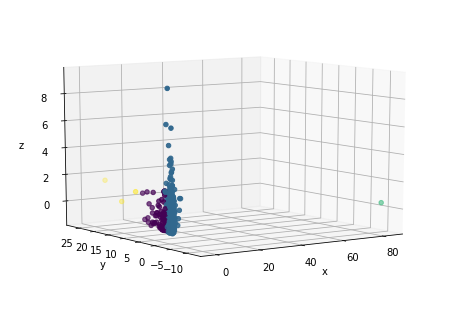

In [242]:
from sklearn.cluster import KMeans

## k-means++ 
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(data_new_3d)
draw_Point_Cloud(data_new_3d, y_pred)

In [29]:
from PIL import Image
import numpy as np
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.array( img, dtype="int32" )
    return data

orgin_image = load_image('Lenna.png')

(512, 512, 3)


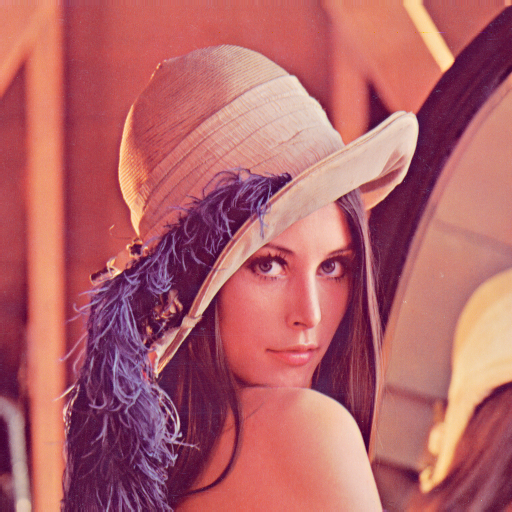

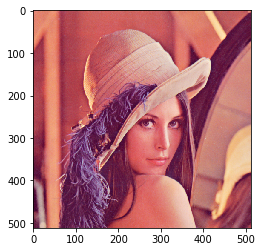

In [30]:
print(orgin_image.shape)
#图像矩阵的大小
## 3ways to show image
# 这个方式会打开文件
img = Image.open('Lenna.png ')
img.show()

from IPython.display import Image as Load_img
from IPython.display import display
img = Load_img(filename='Lenna.png')
display(img)

from matplotlib.pyplot import imshow
%matplotlib inline
imshow(orgin_image)


(512, 512)


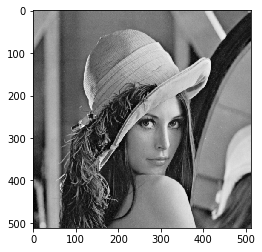

In [292]:
gray = rgb2gray(orgin_image)
print(gray.shape)
imshow(gray, cmap=plt.get_cmap('gray'))

(447, 334, 3)


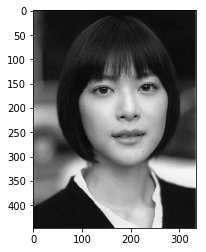

In [285]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

Juri = Image.open('Juri.jpg')
Juri_img = np.array(Juri, dtype="int32")
print(Juri_img.shape)
imshow(Juri_img)



(447, 334)


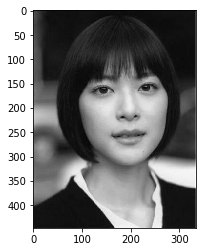

In [293]:
gray_juri = rgb2gray(Juri_img)
print(gray_juri.shape)
imshow(gray_juri, cmap=plt.get_cmap('gray'))

(512, 512)


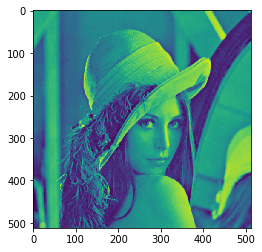

In [31]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
gray_image = rgb2gray(orgin_image)
imshow(gray_image)
print(gray_image.shape)

11. 算法及实例
为了巩固上面的理论，我们在这一节给出一个具体的PCA实例。

PCA算法

总结一下PCA的算法步骤：

设有m条n维数据。

1）将原始数据按列组成n行m列矩阵X

2）将X的每一行（代表一个属性字段）进行零均值化，即减去这一行的均值

3）求出协方差矩阵$$ C = \frac{1}{m}XX^T$$

4）求出协方差矩阵的特征值及对应的特征向量

5）将特征向量按对应特征值大小从上到下按行排列成矩阵，取前k行组成矩阵P

6）Y=PX即为降维到k维后的数据

In [117]:
def princomp(A,numpc=0):
    # computing eigenvalues and eigenvectors of covariance matrix
    #特征减均值
    M = (A-np.mean(A.T,axis=1)).T # subtract the mean (along columns)
    #cov 实现里对条数据进行做了减均值
    #特征值 和 特征向量
    [latent,coeff] = np.linalg.eig(np.cov(M))
    p = np.size(coeff,axis=1)
    idx = np.argsort(latent) # sorting the eigenvalues 特征值大小排序， 得到index 
    idx = idx[::-1]       # in ascending order
    # sorting eigenvectors according to the sorted eigenvalues
    coeff = coeff[:,idx]
    latent = latent[idx] # sorting eigenvalues
    if numpc < p and numpc >= 0:
        coeff=coeff[:,range(numpc)] # cutting some PCs if needed
        score=np.dot(coeff.T,M) # projection of the data in the new space
    return coeff,score,latent
# score 为投影后的数据，降维后的数据
#input_img = np.mean(gray_image, 2) # to get a 2-D array

coeff, score, latent = princomp(gray_image,50)
print(coeff.shape, score.shape, latent.shape)

(512, 50) (50, 512) (512,)


In [152]:
x = np.array([[1,3,4,1],[32,123,21,2],[23,23,12,53]])
#减这个是每个特征做去均值化
print(x.T.mean(axis=1))
print(x.mean(axis=0))
z=x.mean(axis=1).reshape(x.shape[0],-1)
print(z)
print(x - x.mean(axis=1).reshape(x.shape[0],-1))
#每个元素去中心化
y=np.dot(x-z,(x-z).T)/(x.shape[1]-1)
print(np.cov(x))
print(y)

[18.66666667 49.66666667 12.33333333 18.66666667]
[18.66666667 49.66666667 12.33333333 18.66666667]
[[ 2.25]
 [44.5 ]
 [27.75]]
[[ -1.25   0.75   1.75  -1.25]
 [-12.5   78.5  -23.5  -42.5 ]
 [ -4.75  -4.75 -15.75  25.25]]
[[ 2.25000000e+00  2.88333333e+01 -1.89166667e+01]
 [ 2.88333333e+01  2.89233333e+03 -3.38833333e+02]
 [-1.89166667e+01 -3.38833333e+02  3.10250000e+02]]
[[ 2.25000000e+00  2.88333333e+01 -1.89166667e+01]
 [ 2.88333333e+01  2.89233333e+03 -3.38833333e+02]
 [-1.89166667e+01 -3.38833333e+02  3.10250000e+02]]


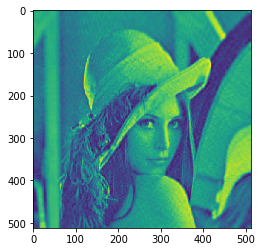

In [118]:
Ar = np.dot(coeff,score).T + np.mean(input_img,axis=0) # image reconstruction
#Ar = np.flipud(Ar)
imshow(Ar.real)

(3, 819)


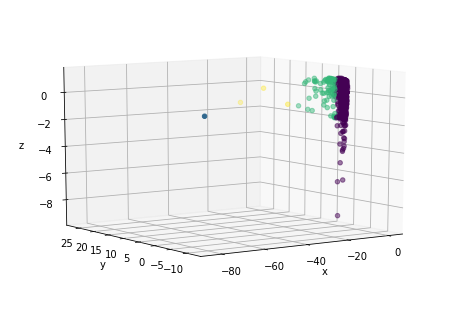

In [119]:
data_pca = princomp(np_data,3)
print(data_pca[1].shape)
data_new_3d = data_pca[1].real.T
from sklearn.cluster import KMeans

## k-means++ 
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(data_new_3d)
draw_Point_Cloud(data_new_3d, y_pred)

## SVD 降维
降维方法PCA与SVD的联系与区别
https://www.cnblogs.com/bjwu/p/9280492.html
一步步教你轻松学奇异值分解SVD降维算法
https://bainingchao.github.io/2018/10/11/%E4%B8%80%E6%AD%A5%E6%AD%A5%E6%95%99%E4%BD%A0%E8%BD%BB%E6%9D%BE%E5%AD%A6%E5%A5%87%E5%BC%82%E5%80%BC%E5%88%86%E8%A7%A3SVD%E9%99%8D%E7%BB%B4%E7%AE%97%E6%B3%95/

In [160]:
data =np.array([[0,-1.6,0.6],[0,1.2,0.8],[0,0,0],[0,0,0]])
print(data)
# SVD分解
u,s, vt = np.linalg.svd(data)
print('U : {}\n Sigma ∑: {} \n V :{} '.format(u,np.diag(s),vt.T))

#得到的u , s, vt 写成数学上的定义：SVD 将原始的数据集矩阵 Data 分解成三个矩阵 U、∑、V

[[ 0.  -1.6  0.6]
 [ 0.   1.2  0.8]
 [ 0.   0.   0. ]
 [ 0.   0.   0. ]]
U : [[ 0.8  0.6  0.   0. ]
 [-0.6  0.8  0.   0. ]
 [ 0.   0.   1.   0. ]
 [ 0.   0.   0.   1. ]]
 Sigma ∑: [[2. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]] 
 V :[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-1.00000000e+00 -5.55111512e-17  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]] 


In [263]:
def svd_decompose(img, s_num):
    img = img.T
    u, s, vt = np.linalg.svd(img)
    h, w = img.shape[:2]
    #s1 = np.diag(s[:s_num],0) #用s_num个奇异值生成新对角矩阵  
    #这里的奇异值已经进行了排序，所以只需要取出来即可。
    #print(s)
#     u1 = np.zeros((h,s_num), float)
#     vt1 = np.zeros((s_num,w), float)
#     u1[:,:] = u[:,:s_num]
    
#     vt1[:,:] = vt[:s_num,:]
#     svd_img = u1.dot(s1).dot(vt1)
    # svd 取出若干个分量，重建
    svd_img = np.dot(np.dot(u[:,:s_num] ,np.diag(s[:s_num],0)), vt[:s_num:])
    
    print('U : {}\n Sigma ∑: {} \n V :{} '.format(u.shape,np.diag(s).shape,vt.T.shape))
    
    Svd_data = img.T.dot( u[:,:s_num]).dot(np.linalg.inv(np.diag(s[:s_num],0)))
    # projection of the data in the new space
    return svd_img,Svd_data




In [264]:
test_data = np.random.randn(100,32)
reconst, trans_data = svd_decompose(test_data, 20)
#参数量变为 20*(100+32+1) << 100*32  np.dot(np.dot(u[:,:s_num] ,np.diag(s[:s_num],0)), vt[:s_num:])
trans_data.shape

U : (32, 32)
 Sigma ∑: (32, 32) 
 V :(100, 100) 


(100, 20)

U : (334, 334)
 Sigma ∑: (334, 334) 
 V :(447, 447) 
U : (334, 334)
 Sigma ∑: (334, 334) 
 V :(447, 447) 
U : (334, 334)
 Sigma ∑: (334, 334) 
 V :(447, 447) 


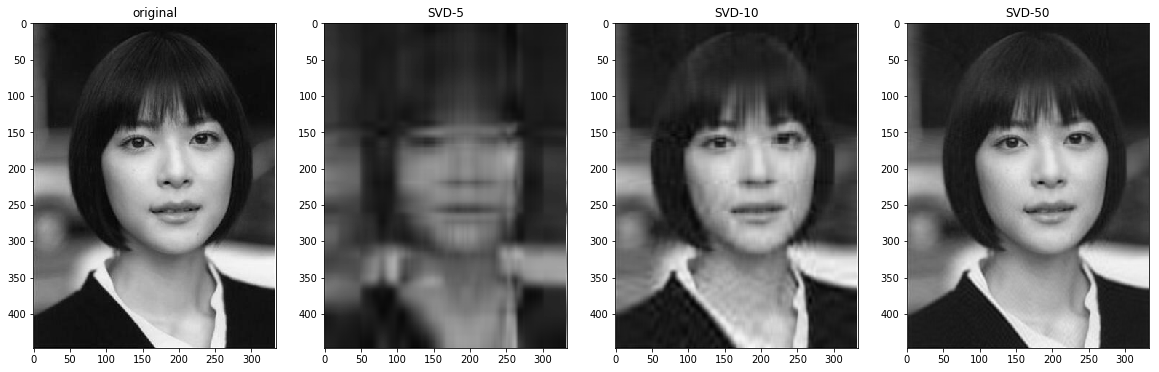

In [298]:
gray_juri_svd_5,_ = svd_decompose(gray_juri,5)
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10));
plt.subplot(141);plt.imshow(gray_juri,cmap=plt.get_cmap('gray'));plt.title('original');
plt.subplot(142);plt.imshow(gray_juri_svd_5.T,cmap=plt.get_cmap('gray'));plt.title('SVD-5');
plt.subplot(143);plt.imshow( svd_decompose(gray_juri,20)[0].T,cmap=plt.get_cmap('gray'));plt.title('SVD-10');
plt.subplot(144);plt.imshow( svd_decompose(gray_juri,50)[0].T,cmap=plt.get_cmap('gray'));plt.title('SVD-50');

## 彩色图片的降维
### 对每个通道的数据进行降维，然后再stack回来、
### https://gadzan.com/principal-component-analysis/ 这个也是类似的做法

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[219.04731821 128.41184281 120.48042334]
(512, 512, 3)


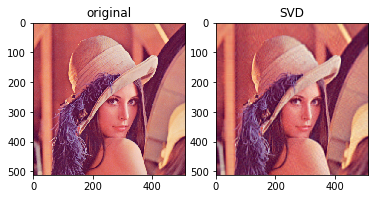

In [215]:

SVD__image_r, svd_data = svd_decompose(orgin_image[...,0],50)
SVD__image_g, svd_data = svd_decompose(orgin_image[...,1],50)
SVD__image_b, svd_data = svd_decompose(orgin_image[...,2],50)

new_rgb_svd_image = np.stack((SVD__image_r.T, SVD__image_g.T,  SVD__image_b.T), axis = 2)
#这里显示图片排布就是 RGB  而不是opencv的BGR

print(new_rgb_svd_image[0][0])
print(orgin_image.shape)
import matplotlib.pyplot as plt
plt.figure(1);
plt.subplot(121);plt.imshow(orgin_image);plt.title('original');
plt.subplot(122);plt.imshow(new_rgb_svd_image/255.0);plt.title('SVD');

### 可以看到，用SVD对数据进行降维，在三维空间的分布也是类似于PCA的

(819, 15)
U : (15, 15)
 Sigma ∑: (15, 15) 
 V :(819, 819) 
(819, 3)


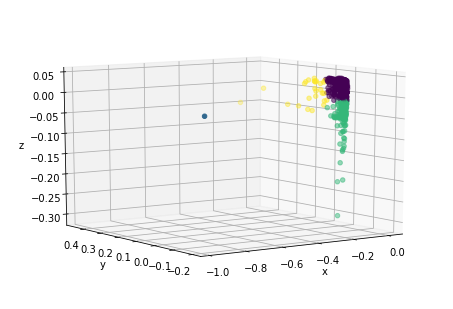

In [216]:
print(np_data.shape)
recon, new_data = svd_decompose(np_data, 3)
print(new_data.shape)
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(new_data)
draw_Point_Cloud(new_data,y_pred)

## 核方法 核PCA
运行[文件](PCA-Kmeans.py)可以查看可交互结果。

原理分析https://zhuanlan.zhihu.com/p/59775730

In [243]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
#未测试 https://blog.csdn.net/ChenVast/article/details/79236160
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA 实现.
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      RBF核的调优参数
        
    n_components: int
      要返回的主要组件的数量
    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   
    """
    # 计算成对的欧几里得距离。
    #在MxN维数据集中
    sq_dists = pdist(X, 'sqeuclidean')
 
    # 将成对距离转换成方阵。
    mat_sq_dists = squareform(sq_dists)
 
    # 计算对称核矩阵。
    K = exp(-gamma * mat_sq_dists)
 
    # 中心核矩阵.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
 
    # 从中心核矩阵得到特征对。
    # numpy.eigh 按顺序返回它们
    eigvals, eigvecs = eigh(K)
 
    #收集顶级k特征向量(投影样本)
    X_pc = np.column_stack((eigvecs[:, -i]
                            for i in range(1, n_components + 1)))
 
    return X_pc

(819, 6)


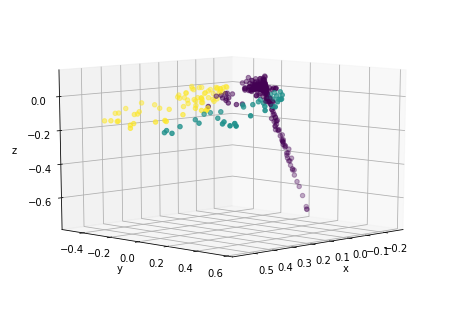

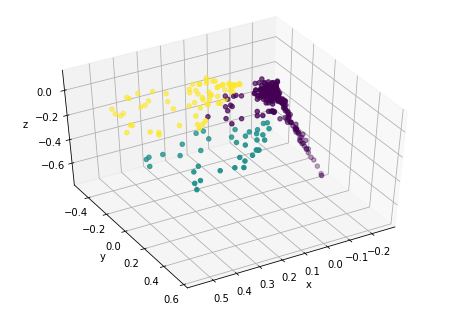

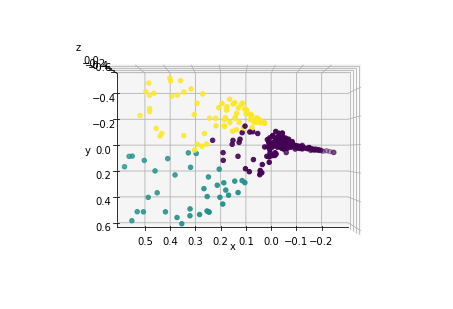

In [252]:
from sklearn.cluster import DBSCAN

from sklearn.decomposition import KernelPCA

pca = KernelPCA(n_components=6,kernel='rbf',gamma=15)
np_data_3d = pca.fit(np_data)



data_new_3d = pca.transform(np_data)

#显示处理后数据大小
print(data_new_3d.shape)

## k-means++ 
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(data_new_3d)
draw_Point_Cloud(data_new_3d, y_pred,elev=10,azim=45)
draw_Point_Cloud(data_new_3d, y_pred,elev=45,azim=60)
draw_Point_Cloud(data_new_3d, y_pred,elev=90,azim=90)

#从这个 角度看， 通过核pca数据在三维空间内都可以区分开了，。

In [13]:
type(data_new_3d)

numpy.ndarray

In [16]:
import h5py
with h5py.File('..\Data\\3d_scatter_data.h5','w') as f:
    f.create_dataset('data', data = data_new_3d)
    f.create_dataset('label', data = y_pred)
